# This script will be used to extract the temp data from the nc files. 

In [7]:
#!pip install basemap

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import xarray
import rioxarray as rxr
import netCDF4
import scipy
import pandas as pd
import numpy as np
import cftime
import matplotlib.pyplot

In [4]:
# Replace 'file_path.nc' with the actual path to your NetCDF file
file_path = r"C:\Users\kizar\download.nc"

In [5]:
# Step 1: Read the data from the NetCDF file using xarray
data = xarray.open_dataset(file_path)
data

<xarray.Dataset>
Dimensions:    (longitude: 143, latitude: 61, time: 8760)
Coordinates:
  * longitude  (longitude) float32 -14.19 -13.94 -13.69 ... 20.81 21.06 21.31
  * latitude   (latitude) float32 48.38 48.13 47.88 47.63 ... 33.88 33.63 33.38
  * time       (time) datetime64[ns] 2022-01-01 ... 2022-12-31T23:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-08-05 11:17:22 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [6]:
data.dims


Frozen({'longitude': 143, 'latitude': 61, 'time': 8760})

In [7]:
data.coords

Coordinates:
  * longitude  (longitude) float32 -14.19 -13.94 -13.69 ... 20.81 21.06 21.31
  * latitude   (latitude) float32 48.38 48.13 47.88 47.63 ... 33.88 33.63 33.38
  * time       (time) datetime64[ns] 2022-01-01 ... 2022-12-31T23:00:00

In [8]:
data.attrs

{'Conventions': 'CF-1.6',
 'history': '2023-08-05 11:17:22 GMT by grib_to_netcdf-2.25.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf.bin -S param -o /cache/data7/adaptor.mars.internal-1691234217.565297-5037-14-3b522b08-3bcb-4983-a4ea-cf4a136d552f.nc /cache/tmp/3b522b08-3bcb-4983-a4ea-cf4a136d552f-adaptor.mars.internal-1691234008.0792592-5037-29-tmp.grib'}

In [9]:
# slicing through time
# once you read the variable it is an array not a dataset anymore

data.t2m

<xarray.DataArray 't2m' (time: 8760, latitude: 61, longitude: 143)>
[76413480 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -14.19 -13.94 -13.69 ... 20.81 21.06 21.31
  * latitude   (latitude) float32 48.38 48.13 47.88 47.63 ... 33.88 33.63 33.38
  * time       (time) datetime64[ns] 2022-01-01 ... 2022-12-31T23:00:00
Attributes:
    units:      K
    long_name:  2 metre temperature

In [10]:
data.info()

xarray.Dataset {
dimensions:
	longitude = 143 ;
	latitude = 61 ;
	time = 8760 ;

variables:
	float32 longitude(longitude) ;
		longitude:units = degrees_east ;
		longitude:long_name = longitude ;
	float32 latitude(latitude) ;
		latitude:units = degrees_north ;
		latitude:long_name = latitude ;
	datetime64[ns] time(time) ;
		time:long_name = time ;
	float32 t2m(time, latitude, longitude) ;
		t2m:units = K ;
		t2m:long_name = 2 metre temperature ;

// global attributes:
	:Conventions = CF-1.6 ;
	:history = 2023-08-05 11:17:22 GMT by grib_to_netcdf-2.25.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf.bin -S param -o /cache/data7/adaptor.mars.internal-1691234217.565297-5037-14-3b522b08-3bcb-4983-a4ea-cf4a136d552f.nc /cache/tmp/3b522b08-3bcb-4983-a4ea-cf4a136d552f-adaptor.mars.internal-1691234008.0792592-5037-29-tmp.grib ;
}

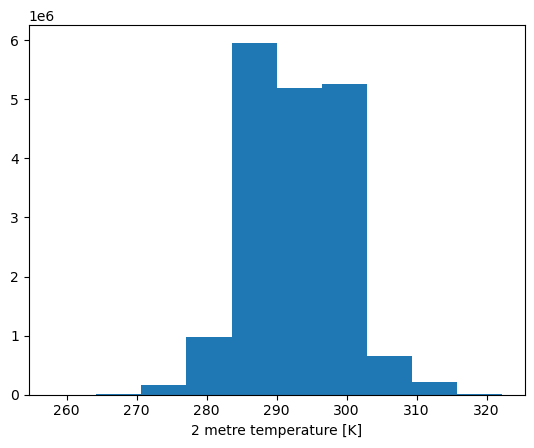

In [11]:
# Define the latitude and longitude range
min_latitude = 35.88
max_latitude = 40.4637
min_longitude = 2.06
max_longitude = 3.7492

# Replace 'your_variable_name' with the actual name of the temperature variable
variable_name = 't2m'

# Extract the temperature variable
temperature = data[variable_name]
temperature
# Extract temperature values within the specified latitude and longitude range
temperature_slice = temperature.sel(
    latitude=slice('40', '30'),
    longitude=slice('2', '5')
)
temperature_slice
# Now you have the temperature values within the specified coordinate range for all time values
# You can access the values using temperature_slice.values or work with the xarray DataArray as needed
temperature_slice.plot()


# Slice through time for the same lat lon
# Extract temperature values in a separate dataframe with respect to time
temperature_time_slice = temperature_slice.sel(time=slice('2022-01-01', '2022-02-01'))

# Convert the temperature_time_slice to a pandas DataFrame
temperature_df = temperature_time_slice.to_dataframe()
temperature_df

data.close()

# Try 2


In [1]:
import os, sys # use to create, modify, and save file names
from netCDF4 import Dataset # to read nc files
import pandas as pd # to read and modify dataframes
from datetime import datetime, timedelta # used to manipulate date and time
import matplotlib.pyplot as plt #to plot the data
import numpy as np #
import datetime
import warnings # to avoid unnecessary warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
test_data = Dataset("C:/Users/kizar/download.nc", 'r')
print(test_data.variables.keys)

<built-in method keys of dict object at 0x000001EDD740E680>


In [3]:
# taking the main variable out

temp =test_data.variables['t2m']

# Extract the temperature variable
temp

<class 'netCDF4._netCDF4.Variable'>
int16 t2m(time, latitude, longitude)
    scale_factor: 0.00121659161328429
    add_offset: 282.3571340137637
    _FillValue: -32767
    missing_value: -32767
    units: K
    long_name: 2 metre temperature
unlimited dimensions: 
current shape = (8760, 61, 143)
filling on

In [4]:

temp_units =test_data.variables['t2m'].units

# Extract the temperature variable
temp_units

'K'

In [5]:
lat =test_data.variables['latitude']

# Extract the temperature variable
lat
max(lat)


masked_array(data=48.38,
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [6]:
min(lat)

masked_array(data=33.38,
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [7]:
lon =test_data.variables['longitude']

# Extract the temperature variable
lon
min(lon)


masked_array(data=-14.19,
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [8]:
time =test_data.variables['time']

# Extract the temperature variable
time

<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: hours since 1900-01-01 00:00:00.0
    long_name: time
    calendar: gregorian
unlimited dimensions: 
current shape = (8760,)
filling on, default _FillValue of -2147483647 used

In [9]:
# altogether
temp =test_data.variables['t2m'][:]
temp_units =test_data.variables['t2m'].units
lat =test_data.variables['latitude'][:]
lon =test_data.variables['longitude'][:]
time =test_data.variables['time'][:]
time_units =test_data.variables['time'].units

In [10]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,9))

map = Basemap(projection = 'mill',
             llcrnrlat = -50, 
             urcrnrlat=50,
             llcrnrlon = -180,
             urcrnrlon =180,
             resolution = 'c')

<Figure size 1200x900 with 0 Axes>

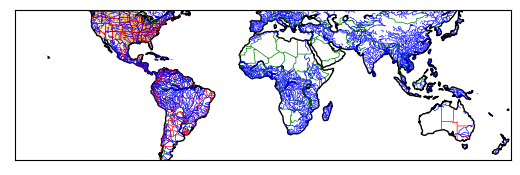

In [11]:
# lets add states, borders and all
map.drawcoastlines()
map.drawcountries(color = 'green')
map.drawstates(color = 'red')
map.drawcounties(color = 'orange')
map.drawrivers(color = 'blue')
plt.show()

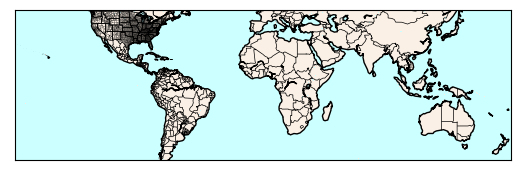

In [12]:
# lets add states, borders and all
map.drawcoastlines()
map.drawcountries()
map.drawstates()
map.drawcounties()
map.drawlsmask(land_color = 'Linen', ocean_color = '#CCFFFF')
plt.show()

In [13]:
# transforming lat and lon
#since it is between 180 degrees
lons,lats = np.meshgrid(lon, lat)

x,y = map(lons,lats)

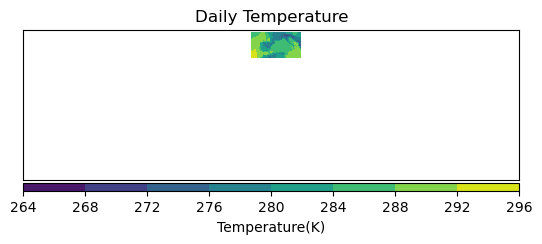

In [14]:
# plotting the map layer with the basemap

t2m = map.contourf(x,y,temp[5,:,:])
cb = map.colorbar(t2m, "bottom", size = "5%", pad = "2%")
plt.title("Daily Temperature") # for the title of the plot
cb.set_label('Temperature({})'.format(temp_units))

In [16]:
#closer view

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))

map = Basemap(projection = 'mill',
             llcrnrlat = 38.38, 
             urcrnrlat=48.38,
             llcrnrlon = -14.19,
             urcrnrlon =21.31,
             resolution = 'c')

<Figure size 1600x1000 with 0 Axes>

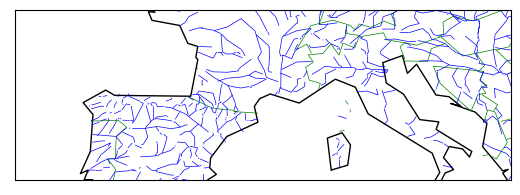

In [31]:
# lets add states, borders and all
map.drawcoastlines()
map.drawcountries(color = 'green')
map.drawstates(color = 'red')
map.drawcounties(color = 'orange')
map.drawrivers(color = 'blue')
plt.show()

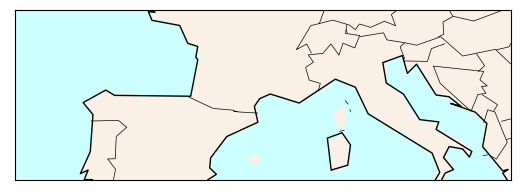

In [17]:
# lets add states, borders and all
map.drawcoastlines()
map.drawcountries()
map.drawstates()
map.drawcounties()
map.drawlsmask(land_color = 'Linen', ocean_color = '#CCFFFF')
plt.show()

In [18]:
# transforming lat and lon
#since it is between 180 degrees
lons,lats = np.meshgrid(lon, lat)

x,y = map(lons,lats)

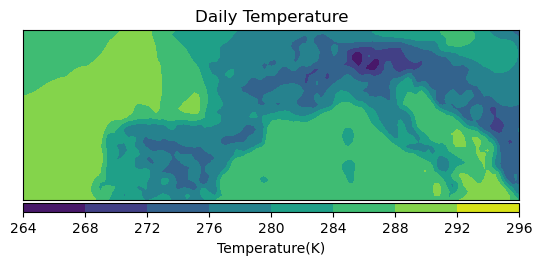

In [19]:
# plotting the map layer with the basemap

t2m = map.contourf(x,y,temp[5,:,:])
cb = map.colorbar(t2m, "bottom", size = "5%", pad = "2%")
plt.title("Daily Temperature") # for the title of the plot
cb.set_label('Temperature({})'.format(temp_units))

# Add shapefile and clip it accordingly

In [20]:
#!pip install cartopy
import xarray
import pandas as pd
import numpy as np
import regionmask
import geopandas as gpd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import warnings # to avoid unnecessary warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [21]:
print(regionmask.__version__)


0.10.0


In [22]:
ib_pen = r"C:\Users\kizar\OneDrive - Universität Salzburg\Desktop\ERASMUS\Salzburg_sem2\Software_development\Final_project\PRT_adm\PRT_adm0.shp"
#our df for shapefile
gdf  = gpd.read_file(ib_pen)
gdf 

,ID_0,ISO,NAME_0,OBJECTID_1,ISO3,NAME_ENGLI,NAME_ISO,NAME_FAO,NAME_LOCAL,NAME_OBSOL,...,CARICOM,EU,CAN,ACP,Landlocked,AOSIS,SIDS,Islands,LDC,geometry
0,182,PRT,Portugal,185,PRT,Portugal,PORTUGAL,Portugal,Portugal,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-16.05835 30.03020, -16.05837 ..."


In [23]:
continents_regions = regionmask.from_geopandas(gdf)
continents_regions

<regionmask.Regions 'unnamed'>
overlap:  False

Regions:
0 r0 Region0

[1 regions]

In [95]:
continents_regions = regionmask.from_geopandas(
    gdf, names="NAME_0", abbrevs="_from_name", name="country"
)
continents_regions


<regionmask.Regions 'country'>
overlap:  False

Regions:
0 Por Portugal

[1 regions]

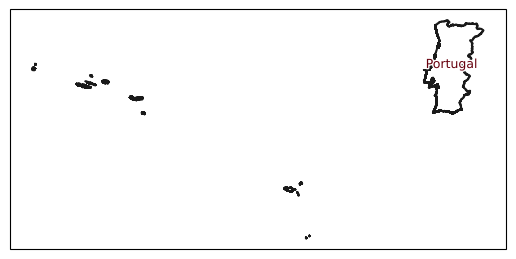

In [97]:
import matplotlib.patheffects as pe

text_kws = dict(
    bbox=dict(color="none"),
    path_effects=[pe.withStroke(linewidth=2, foreground="w")],
    color="#67000d",
    fontsize=9,
)

continents_regions.plot(label="name", add_coastlines=False, text_kws=text_kws);

In [98]:
ds = xarray.open_dataset("C:/Users/kizar/download.nc")



In [104]:
# Define lon and lat values
lon = ds.longitude
lat = ds.latitude

# Create a mask using the continents_regions object
mask = continents_regions.mask(lon, lat)

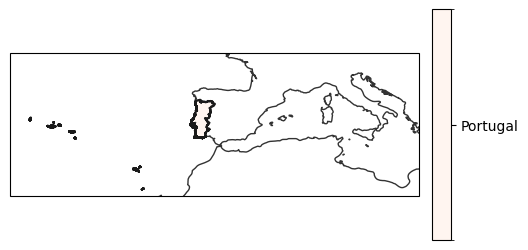

In [102]:
f, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))
h = mask.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="Reds",
    add_colorbar=False,
    levels=np.arange(-0.5, 1),
)

cbar = plt.colorbar(h, shrink=0.625, pad=0.025, aspect=12)
cbar.set_ticks(np.arange(1))
cbar.set_ticklabels(continents_regions.names)

ax.coastlines(color="0.2")

continents_regions.plot_regions(add_label=False);

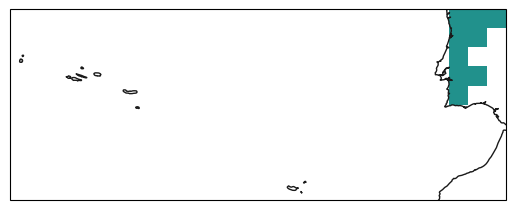

In [92]:
f, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))
mask.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    add_colorbar=False,
)

ax.coastlines(color="0.1");
# fig, ax =plt.subplots(figsize = (16,10))
# gdf.plot(ax=ax, column = 'territory1')

In [87]:
# Create a mask for each geometry
masks = []

for geom in gdf['geometry']:
    if geom.geom_type == 'MULTIPOLYGON':
        mask = gpd.GeoDataFrame({'mask': [geom]}, geometry=[geom], crs=gdf.crs)
        masks.append(mask)
    elif geom.geom_type == 'POLYGON':
        for part in geom:
            mask = gpd.GeoDataFrame({'mask': [part]}, geometry=[part], crs=gdf.crs)
            masks.append(mask)

In [88]:
masks

[]